In [16]:
import cv2
import numpy as np
import operator
import sys, os
import tensorflow as tf 
import matplotlib.pyplot as plt 

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, Model
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D 
from keras import applications  
from keras.utils.np_utils import to_categorical


In [22]:
# Loading the model
trained_model = tf.keras.models.load_model('Trained_Model_30k.h5')
print("Loaded model from disk")

Loaded model from disk


In [23]:
test_model = trained_model
test_model.compile(optimizer='adam', 
                  loss= 'categorical_crossentropy', 
                  metrics = ['accuracy'])

[2]
Predicted : C


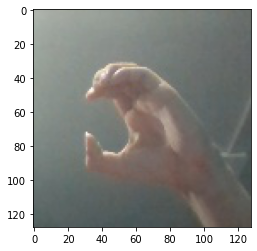

In [19]:
test_img = image.load_img('data2/test/C/1.jpg', target_size=(128, 128))
x_test = image.img_to_array(test_img)
x_test = np.expand_dims(x_test, axis=0)


images = np.vstack([x_test])
classes = test_model.predict(images, batch_size=1)
classes = np.argmax(classes,axis=1)
 
alphabet = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']


plt.imshow(test_img)
print(classes)
print("Predicted :",alphabet[classes[0]])

In [26]:

cap = cv2.VideoCapture(0)

alphabet = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)
    
    # Got this from collect-data.py
    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,255,0) ,1)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    
    # Resizing the ROI so it can be fed to the model for prediction
    roi = cv2.resize(roi, (128, 128)) 
#     roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#     _, test_image = cv2.threshold(roi, 120, 255, cv2.THRESH_BINARY)
    cv2.imshow("test", roi)
    
    # Batch of 1
    img_test = image.img_to_array(roi)
    img_test = np.expand_dims(img_test, axis=0)

    images = np.vstack([img_test])
    classes = test_model.predict(images, batch_size=1)
    classes = np.argmax(classes,axis=1)
    
    # Displaying the predictions
    cv2.putText(frame, alphabet[classes[0]] , (5,80), cv2.FONT_HERSHEY_PLAIN, 5, (51,0,255), 2)    
    cv2.imshow("Frame", frame)
    
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break
        
cap.release()
cv2.destroyAllWindows()

print(roi.shape)

(128, 128, 3)


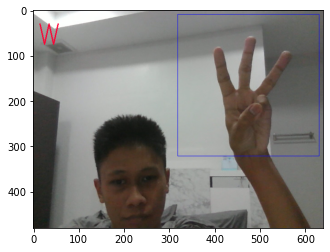

In [11]:
frame2 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame2)